# Deviation Visualisation #

The following script creats a dataframe that sorts the rents per date and time. Then it visualizes deviation of the total rents and rents per hour, per day of the week, per month. It saves the dataframe as csv and the graphic as a PNG and PDF.


In [1]:
#import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from datetime import datetime

In [2]:
#prepare the data
Dataset = pd.read_csv("boston_2019.csv")
df = pd.DataFrame(Dataset['start_time'])

In [3]:
#seperate day of the week, hour, month from the original data
times = pd.to_datetime(df.start_time)
dailyData = pd.DataFrame(times)
dailyData["weekday"] = times.dt.weekday
dailyData["hour"] = times.dt.hour
dailyData["month"] = times.dt.month

In [4]:
#calculate rents per date and time
c = dailyData.groupby([times.dt.date, times.dt.hour]).agg(lambda col: col.tolist())
c['count']= ''
for i in range(0, len(c)):
    c['count'].iloc[i] = len(c['hour'].iloc[i])

In [5]:
#make a dataframe grouped by date and time
result = dailyData.groupby([times.dt.date, times.dt.hour]).agg(lambda col: col.tolist())
result['count']= ''
for i in range(0, len(c)):
    result['count'].iloc[i] = len(c['hour'].iloc[i])

for i in range(0, len(c)):
    result['hour'].iloc[i] = (c['hour'].iloc[i])[0]
    
for i in range(0, len(c)):
    result['weekday'].iloc[i] = (c['weekday'].iloc[i])[0]
    
for i in range(0, len(c)):
    result['month'].iloc[i] = (c['month'].iloc[i])[0]


[Text(0.5, 0, 'Month Of The Year'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Month Of The Year')]

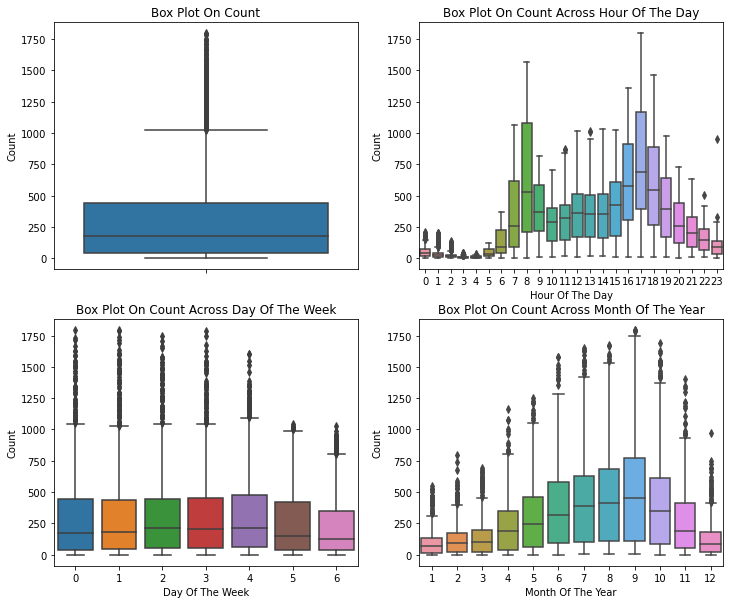

In [6]:
#visualize the deviation across hour, day of the week, month
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=result,y="count",orient="v",ax=axes[0][0])
sn.boxplot(data=result,y="count",x="hour",orient="v",ax=axes[0][1])
sn.boxplot(data=result,y="count",x="weekday",orient="v",ax=axes[1][0])
sn.boxplot(data=result,y="count",x="month",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][0].set(xlabel='Day Of The Week', ylabel='Count',title="Box Plot On Count Across Day Of The Week")
axes[1][1].set(xlabel='Month Of The Year', ylabel='Count',title="Box Plot On Count Across Month Of The Year")

In [7]:
# Save the picture as PNG and PDF file
fig.savefig('Deviation.pdf', dpi=300)
fig.savefig('Deviation.png', dpi=300)

In [8]:
result.to_csv('Deviation_By_Date_And_Hour.csv')